In [1]:
!pip install matplotlib pandas

In [2]:
#Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
mouse_metadata = pd.read_csv("Mouse_metadata.csv")
Study_results = pd.read_csv("Study_results.csv")

In [4]:
merged_data = pd.merge(mouse_metadata, Study_results, on="Mouse ID")

In [5]:
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
mice_count = merged_data["Mouse ID"].nunique()
mice_count

249

In [7]:
cleaned_data = merged_data[merged_data["Mouse ID"] != 'g989']
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
updated_unique_mice_count = cleaned_data['Mouse ID'].nunique()
print("Number of unique mice IDs after cleaning:", updated_unique_mice_count)

Number of unique mice IDs after cleaning: 248


In [9]:
duplicate_mouse_ids = merged_data[merged_data.duplicated(["Mouse ID", "Timepoint"], keep=False)]
print("Mouse IDs with deuplicate time points:")
duplicate_mouse_ids

Mouse IDs with deuplicate time points:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
summary_statistics = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Variance', 'var'),
    ('Standard Deviation', 'std'),
    ('SEM', 'sem')
]).reset_index()

In [11]:
summary_statistics.columns = ['Drug Regimen', 'Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_statistics

,Drug Regimen,Mean,Median,Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [12]:
summary_statistics.set_index("Drug Regimen", inplace = True)
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

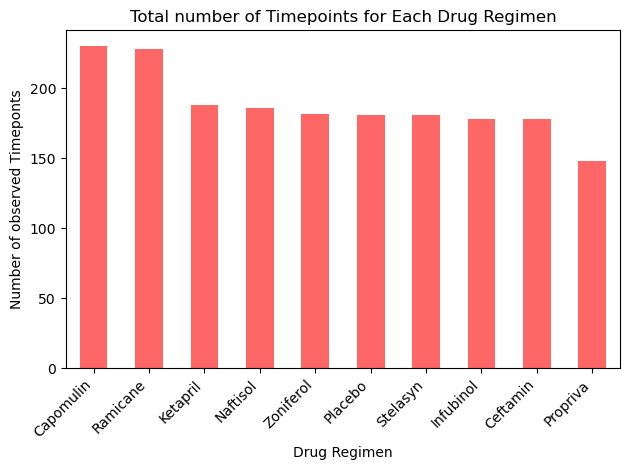

In [13]:
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()
drug_regimen_counts.plot(kind="bar", color="Red", alpha=.6)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of observed Timeponts")
plt.title("Total number of Timepoints for Each Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

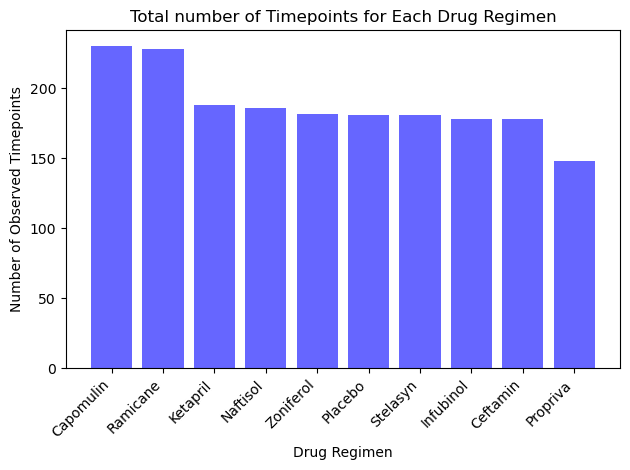

In [14]:
# bar plot using pyplot.
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color="Blue", alpha=.6)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Timepoints")
plt.title("Total number of Timepoints for Each Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [15]:
gender_counts = cleaned_data["Sex"].value_counts()

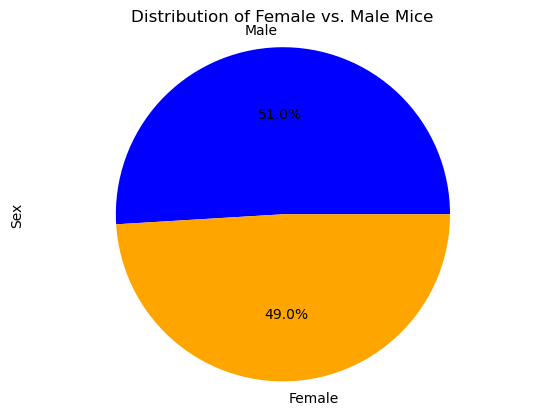

In [16]:
gender_counts.plot(kind="pie", autopct="%1.1f%%", colors=["blue", "orange"])
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.show()

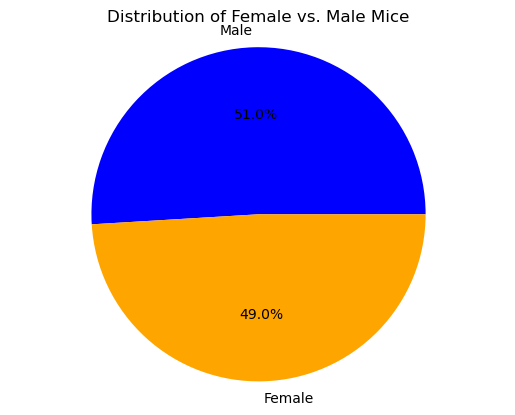

In [17]:
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["Blue", "orange"])
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers, Boxplots

In [102]:
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoints_df = last_timepoints.reset_index()
last_timepoints_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [103]:
final_tumor_volume = pd.merge(last_timepoints_df, cleaned_data, on = ["Mouse ID", "Timepoint"], how = "left")
final_tumor_volume

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [104]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []

for treatment in treatments:
    tumor_vol_per_treatment = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    tumor_vol_list.append(tumor_vol_per_treatment)
    
    quartiles = tumor_vol_per_treatment.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = tumor_vol_per_treatment[(tumor_vol_per_treatment < lower_bound) | (tumor_vol_per_treatment > upper_bound)]
    print(f"Outliers for {treatment}: {outliers}")

Outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [105]:
tumor_vol_list

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

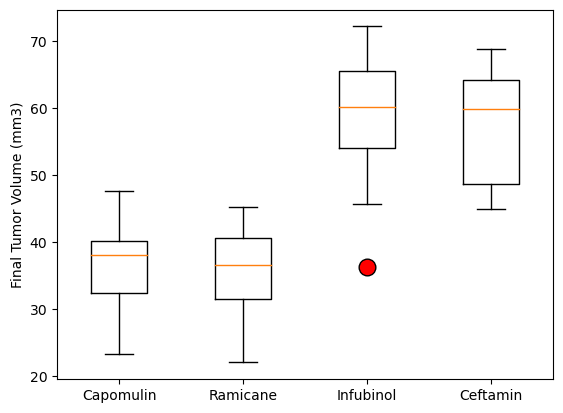

In [107]:
# box plot of the distrubution of the tumor volume for each treatment group.
red_out = dict(markerfacecolor = "red", markersize = 12)
plt.boxplot(tumor_vol_list, labels = treatments, flierprops = red_out)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

In [42]:
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [43]:
selected_mouse_data = capomulin_data.loc[capomulin_data['Mouse ID']== 'l509']

In [44]:
selected_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207288,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


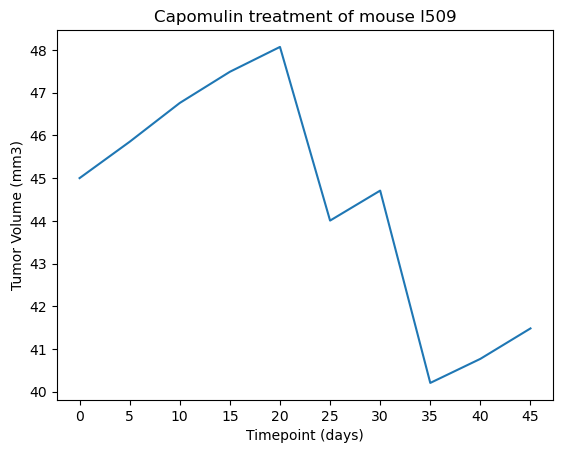

In [45]:
plt.plot(selected_mouse_data['Timepoint'],selected_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
days_interval = 5
plt.xticks(range(0, max(selected_mouse_data['Timepoint']) + 1, days_interval))
plt.show()

In [46]:
avg_tumor_volume_per_mouse = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

In [47]:
mouse_weight_vs_tumor_volume = pd.DataFrame({
    'Mouse Weight (g)': capomulin_data.groupby('Mouse ID')['Weight (g)'].mean(),
    'Average Tumor Volume (mm3)': avg_tumor_volume_per_mouse
}).reset_index()

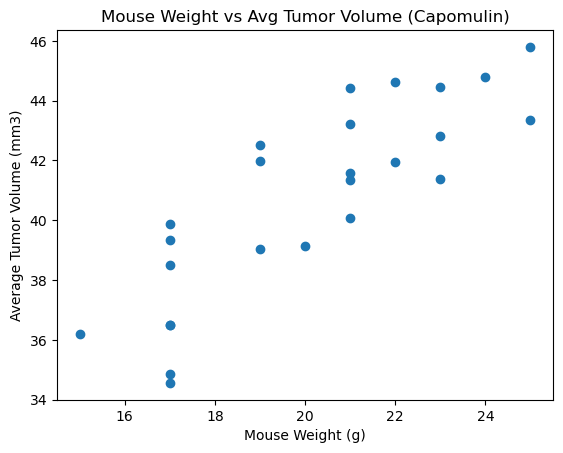

In [48]:
plt.scatter(mouse_weight_vs_tumor_volume["Mouse Weight (g)"],
            mouse_weight_vs_tumor_volume["Average Tumor Volume (mm3)"], marker="o")
plt.title("Mouse Weight vs Avg Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [49]:
pip install scipy statsmodels

Note: you may need to restart the kernel to use updated packages.


In [50]:
correlation_coefficient = stats.pearsonr(mouse_weight_vs_tumor_volume["Mouse Weight (g)"],
                                        mouse_weight_vs_tumor_volume["Average Tumor Volume (mm3)"])[0]
print(f"Correlation Coefficient: {correlation_coefficient}")

Correlation Coefficient: 0.8419363424694721


In [51]:
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weight_vs_tumor_volume['Mouse Weight (g)'],
                                                               mouse_weight_vs_tumor_volume['Average Tumor Volume (mm3)'])

In [52]:
print(f"Slope (Coefficient): {slope}")
print(f"INtercept: {intercept}")

Slope (Coefficient): 0.9544396890241049
INtercept: 21.552160532685008


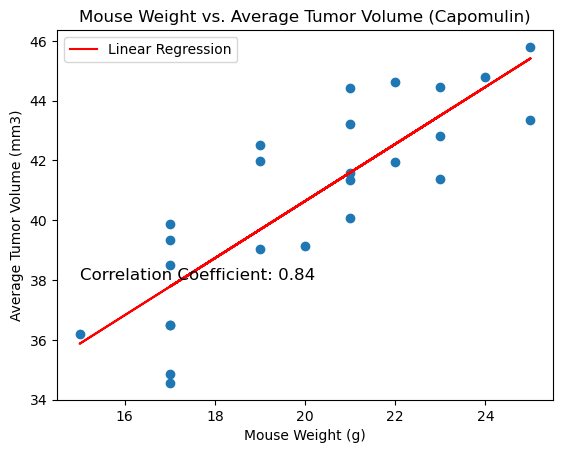

In [53]:
plt.scatter(mouse_weight_vs_tumor_volume['Mouse Weight (g)'],
            mouse_weight_vs_tumor_volume['Average Tumor Volume (mm3)'], marker='o')
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(mouse_weight_vs_tumor_volume['Mouse Weight (g)'],
         slope * mouse_weight_vs_tumor_volume['Mouse Weight (g)'] + intercept, color='red', label='Linear Regression')
correlation_coefficient = stats.pearsonr(mouse_weight_vs_tumor_volume['Mouse Weight (g)'],
                                         mouse_weight_vs_tumor_volume['Average Tumor Volume (mm3)'])[0]
plt.text(15, 38, f"Correlation Coefficient: {correlation_coefficient:.2f}", fontsize=12)
plt.legend()
plt.show()